Hola **Cristian**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final

Link para la presentación de resultados: https://drive.google.com/file/d/19RXUw0kAdupYHF2sp6BTAssYxBCuR5Fe/view?usp=sharing

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por la presentación realizada, resume súper bien los hallazgos y los resultados del análisis, buen trabajo!
</div>

In [29]:
# Cargar Librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import spearmanr, pearsonr
from scipy.stats import mannwhitneyu

In [3]:
#Leer archivos

df = pd.read_csv('telecom_dataset_us.csv')
clients = pd.read_csv('telecom_clients_us.csv')

## Análisis Exploratorio

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
# Cambiar tipo de dato
df['date'] = pd.to_datetime(df['date'])

# Sumar 3 horas y quitar la zona horaria
df['date'] = (df['date'] + pd.Timedelta(hours=3)).dt.tz_localize(None)

df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 03:00:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 03:00:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 03:00:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 03:00:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 03:00:00,out,False,880022.0,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 03:00:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 03:00:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 03:00:00,out,True,957922.0,False,4,3130,3190
53900,168606,2019-11-15 03:00:00,out,True,957922.0,False,4,3130,3190


In [6]:
#Eliminar valores ausentes de 'internal'
df = df.dropna(subset=['internal'])
df['internal'].isna().sum()

np.int64(0)

In [7]:
#Eliminar valores ausentes de 'operator_id'
df = df.dropna(subset=['operator_id'])
df['operator_id'].isna().sum()

np.int64(0)

In [8]:
df['operator_id'] = df['operator_id'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45670 non-null  int64         
 1   date                 45670 non-null  datetime64[ns]
 2   direction            45670 non-null  object        
 3   internal             45670 non-null  object        
 4   operator_id          45670 non-null  int64         
 5   is_missed_call       45670 non-null  bool          
 6   calls_count          45670 non-null  int64         
 7   call_duration        45670 non-null  int64         
 8   total_call_duration  45670 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(2)
memory usage: 3.2+ MB


In [10]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [11]:
clients['date_start'] = pd.to_datetime(clients['date_start'])
clients

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


## Análisis Exploratorio

In [12]:
df['call_duration'].max()

np.int64(144395)

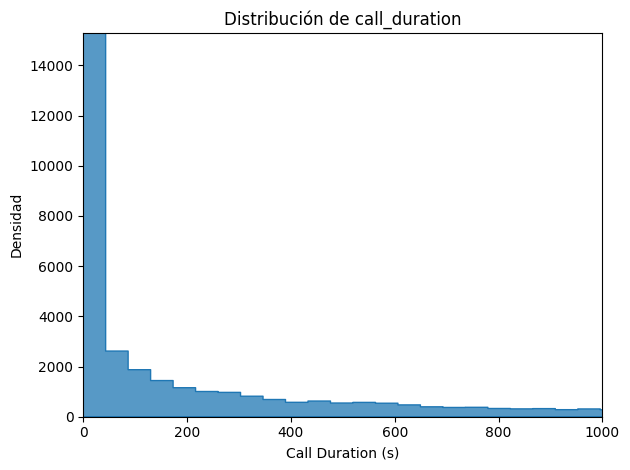

In [36]:
sns.histplot(data=df, x='call_duration',  element='step', )
plt.ylim(0, 15300)
plt.xlim(0, 1000)
plt.title(f'Distribución de call_duration')
plt.xlabel('Call Duration (s)')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

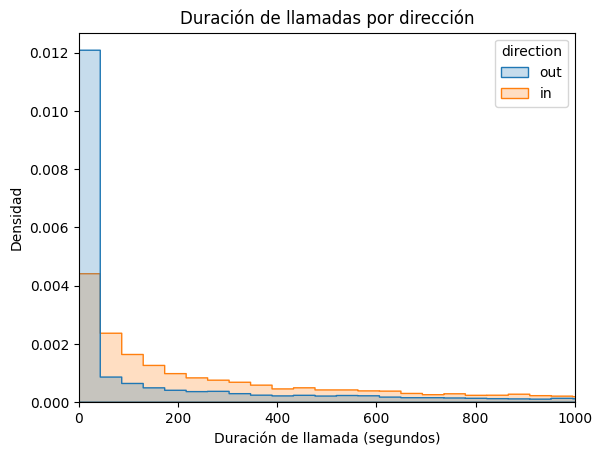

In [32]:
sns.histplot(
    data=df,
    x='call_duration',
    hue='direction',
    element='step',        # líneas para evitar solapamiento
    stat='density',        # para comparar formas de distribución
    common_norm=False      # normaliza por grupo
)
plt.xlim(0, 1000)
plt.title('Duración de llamadas por dirección')
plt.xlabel('Duración de llamada (segundos)')
plt.ylabel('Densidad')
plt.show()

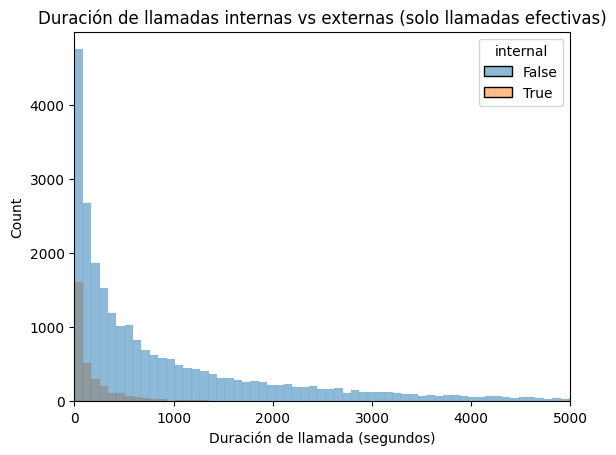

In [37]:
sns.histplot(
    data=df[~df['is_missed_call']],  # Solo llamadas efectivas
    x='call_duration',
    hue='internal',          # Comparar internas vs externas
    element='bars',
    stat='count'
)
plt.title('Duración de llamadas internas vs externas (solo llamadas efectivas)')
plt.xlim(0, 5000)
plt.xlabel('Duración de llamada (segundos)')
plt.show()

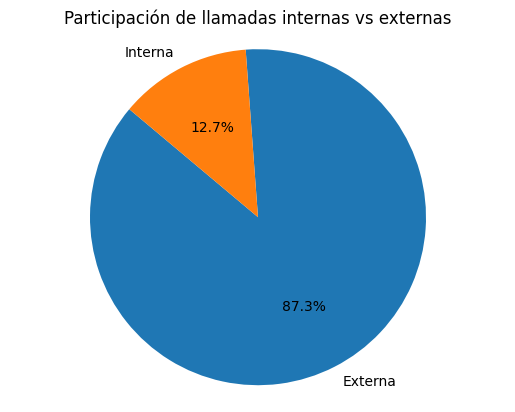

In [16]:
# Contar cuántas llamadas son internas (True) vs externas (False)
counts = df['internal'].value_counts()

# Etiquetas para el gráfico
labels = ['Externa', 'Interna'] if counts.index[0] == False else ['Interna', 'Externa']

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Participación de llamadas internas vs externas')
plt.axis('equal')  # Para que el círculo no se deforme
plt.show()

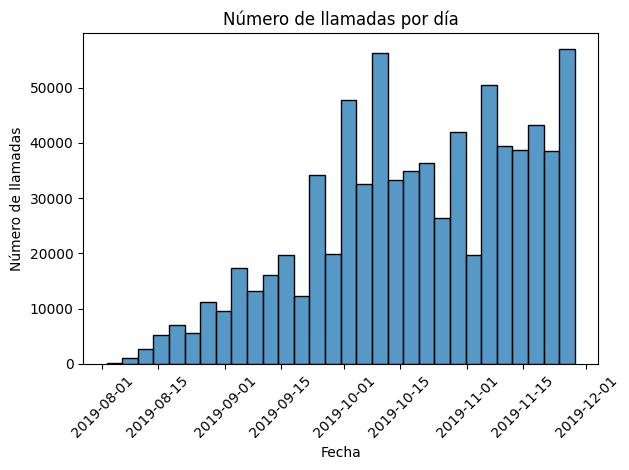

In [17]:
# Agrupar y sumar las llamadas por día
llamadas_por_dia = df.groupby('date')['calls_count'].sum().reset_index()

# Graficar el histograma
sns.histplot(data=llamadas_por_dia, x='date', weights='calls_count', bins=30)
plt.title('Número de llamadas por día')
plt.xlabel('Fecha')
plt.ylabel('Número de llamadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Filtrar solo llamadas entrantes
entrantes = df[df['direction'] == 'in']

entrantes['tiempo_espera'] = entrantes['total_call_duration'] - entrantes['call_duration']

# Calcular estadísticas por operador
resumen = entrantes.groupby('operator_id').agg(
    total_entrantes=('calls_count', 'sum'),
    llamadas_perdidas=('is_missed_call', lambda x: (x == True).sum()),
    llamadas_recibidas=('is_missed_call', lambda x: (x == False).sum()),
    duracion_promedio_respuestas=('call_duration', lambda x: x[entrantes['is_missed_call'] == False].mean())
).reset_index()

# Calcular tasa de llamadas perdidas
resumen['tasa_perdidas'] = resumen['llamadas_perdidas'] / resumen['total_entrantes']

C:\Users\crisd\AppData\Local\Temp\ipykernel_8736\448970279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entrantes['tiempo_espera'] = entrantes['total_call_duration'] - entrantes['call_duration']


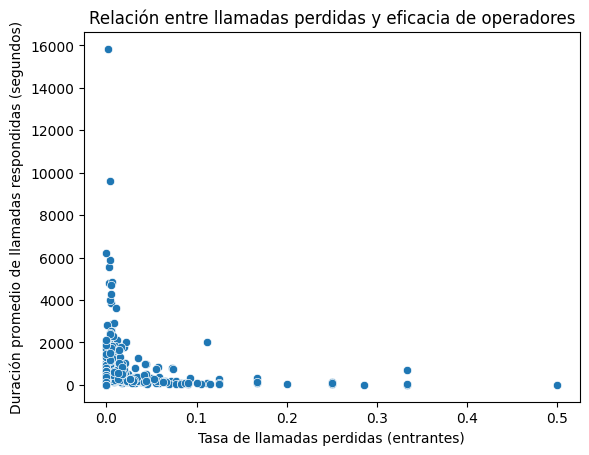

In [19]:
sns.scatterplot(data=resumen, x='tasa_perdidas', y='duracion_promedio_respuestas')
plt.title('Relación entre llamadas perdidas y eficacia de operadores')
plt.xlabel('Tasa de llamadas perdidas (entrantes)')
plt.ylabel('Duración promedio de llamadas respondidas (segundos)')
plt.show()

El gráfico permite mostrar la baja eficacia del equipo, dado que los operadores con mas llamadas perdidas tienden a tener duraciones promedio mas bájas o nulas.

In [20]:
resumen1 = entrantes.groupby('operator_id').agg(
    espera_promedio=('tiempo_espera', 'mean'),
    tasa_perdidas=('is_missed_call', lambda x: x.sum() / x.count()),
    duracion_atendidas=('call_duration', lambda x: x[entrantes.loc[x.index, 'is_missed_call'] == False].mean())
).reset_index()

In [21]:
resumen1.corr()

,operator_id,espera_promedio,tasa_perdidas,duracion_atendidas
operator_id,1.000000,-0.022101,0.028461,0.035629
espera_promedio,-0.022101,1.000000,0.238123,0.582938
tasa_perdidas,0.028461,0.238123,1.000000,0.357077
duracion_atendidas,0.035629,0.582938,0.357077,1.000000


In [22]:
salientes = df[df['direction'] == 'out']

resumen_salientes = salientes.groupby('operator_id').agg(
    total_llamadas=('calls_count', 'sum'),
    duracion_promedio=('call_duration', 'mean'),
    total_duracion=('call_duration', 'sum')
).reset_index()

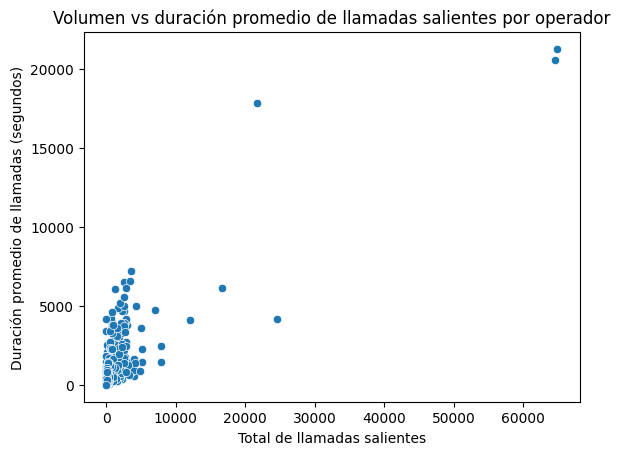

In [23]:
sns.scatterplot(data=resumen_salientes, x='total_llamadas', y='duracion_promedio')
plt.title('Volumen vs duración promedio de llamadas salientes por operador')
plt.xlabel('Total de llamadas salientes')
plt.ylabel('Duración promedio de llamadas (segundos)')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El EDA es para conocer los datos y entender los mismos, cada que muestres una gráfica debes redactar su interpretación de lo contrario no es claro lo que se quiere comunicar con las mismas
</div>

In [28]:
#Operadores ineficientes tienen un total de llamadas menor a 50 y una duración promedio menor a 30 segundos.

ineficientes = resumen_salientes[
    (resumen_salientes['total_llamadas'] < 50) &
    (resumen_salientes['duracion_promedio'] < 30)
]
total_ineficientes = ineficientes['operator_id'].nunique()
total_salientes = resumen_salientes['operator_id'].nunique()

print(f'De un total de {total_salientes} operadores, el {(total_ineficientes/total_salientes)*100:.2f}% es ineficiente')

De un total de 882 operadores, el 18.14% es ineficiente


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Este tipo de decisiones deben quedar redactadas, debes explicar por qué se está tomando esos umbrales para determinar si un operador es eficiente o no
</div>

## Pruebas de Hipótesis

- H0: Los operadores con más llamadas entrantes perdidas no tienden a ser menos eficaces.

- H1: Los operadores con más llamadas entrantes perdidas tienden a ser menos eficaces.

In [27]:
# Eliminar posibles valores nulos
resumen1 = resumen1.dropna(subset=['tasa_perdidas', 'espera_promedio'])

# Spearman
corr_s, pval_s = spearmanr(resumen1['tasa_perdidas'], resumen1['espera_promedio'])
print(f"🔹 Spearman: correlación = {corr_s:.3f}, p-valor = {pval_s:.4f}")
if pval_s < 0.05:
    print("✅ Se rechaza la hipótesis nula: los operadores con más llamadas perdidas tienden a ser menos eficaces.")
else:
    print("❌ No se rechaza la hipótesis nula: no hay evidencia de que los operadores con más llamadas perdidas sean menos eficaces.")

# Pearson
corr_p, pval_p = pearsonr(resumen1['tasa_perdidas'], resumen1['espera_promedio'])
print(f"\n🔹 Pearson: correlación = {corr_p:.3f}, p-valor = {pval_p:.4f}")
if pval_p < 0.05:
    print("✅ Se rechaza la hipótesis nula: los operadores con más llamadas perdidas tienden a ser menos eficaces.")
else:
    print("❌ No se rechaza la hipótesis nula: no hay evidencia de que los operadores con más llamadas perdidas sean menos eficaces.")

🔹 Spearman: correlación = 0.378, p-valor = 0.0000
✅ Se rechaza la hipótesis nula: los operadores con más llamadas perdidas tienden a ser menos eficaces.

🔹 Pearson: correlación = 0.238, p-valor = 0.0000
✅ Se rechaza la hipótesis nula: los operadores con más llamadas perdidas tienden a ser menos eficaces.


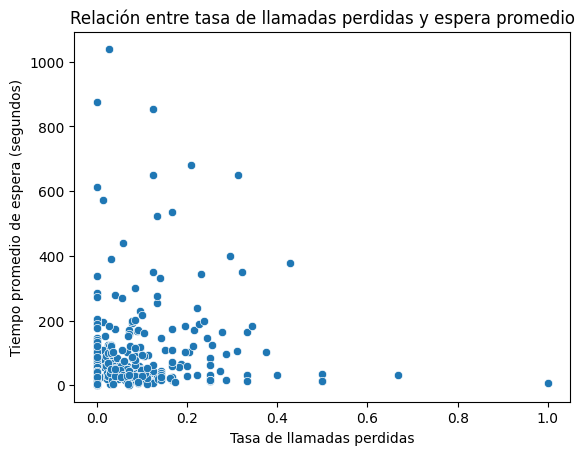

In [38]:
sns.scatterplot(data=resumen1, x='tasa_perdidas', y='espera_promedio')
plt.title("Relación entre tasa de llamadas perdidas y espera promedio")
plt.xlabel("Tasa de llamadas perdidas")
plt.ylabel("Tiempo promedio de espera (segundos)")
plt.show()

H2: Un mayor tiempo de espera promedio en llamadas entrantes se asocia con ineficiencia.

In [30]:
# Extraer IDs de operadores ineficientes
ids_ineficientes = set(ineficientes['operator_id'])

# Separar los dos grupos desde resumen1
grupo_ineficiente = resumen1[resumen1['operator_id'].isin(ids_ineficientes)]['espera_promedio']
grupo_eficiente = resumen1[~resumen1['operator_id'].isin(ids_ineficientes)]['espera_promedio']

# Eliminar posibles nulos
grupo_ineficiente = grupo_ineficiente.dropna()
grupo_eficiente = grupo_eficiente.dropna()

# Mann-Whitney U test
stat, p_val = mannwhitneyu(grupo_ineficiente, grupo_eficiente, alternative='two-sided')

print(f"🔹 Mann-Whitney U-test: estadístico = {stat:.3f}, p-valor = {p_val:.4f}")
if p_val < 0.05:
    print("✅ Se rechaza la hipótesis nula: los operadores ineficientes tienen tiempos de espera significativamente distintos (probablemente mayores).")
else:
    print("❌ No se rechaza la hipótesis nula: no hay evidencia de diferencia significativa en tiempo de espera entre operadores ineficientes y eficientes.")

🔹 Mann-Whitney U-test: estadístico = 24702.000, p-valor = 0.0050
✅ Se rechaza la hipótesis nula: los operadores ineficientes tienen tiempos de espera significativamente distintos (probablemente mayores).


In [31]:
# Unimos ambos resúmenes por operador_id
resumen_total = resumen1.merge(resumen_salientes, on='operator_id', how='left')

# Cortes basados en percentiles
umbral_tasa_perdidas = resumen_total['tasa_perdidas'].quantile(0.75)
umbral_espera = resumen_total['espera_promedio'].quantile(0.75)
umbral_salientes = resumen_total['total_llamadas'].quantile(0.25)

resumen_total['ineficiente'] = (
    (resumen_total['tasa_perdidas'] >= umbral_tasa_perdidas) &
    (resumen_total['espera_promedio'] >= umbral_espera) &
    (resumen_total['total_llamadas'].fillna(0) <= umbral_salientes)  # NaN = no hace llamadas salientes
)


# Comparar tiempos de espera entre eficientes e ineficientes
grupo_inef = resumen_total[resumen_total['ineficiente'] == True]['espera_promedio']
grupo_ef = resumen_total[resumen_total['ineficiente'] == False]['espera_promedio']

stat, p_val = mannwhitneyu(grupo_inef, grupo_ef, alternative='two-sided')

print(f"🔹 Mann-Whitney U-test: estadístico = {stat:.3f}, p-valor = {p_val:.4f}")
if p_val < 0.05:
    print("✅ Se rechaza la hipótesis nula: los operadores ineficaces tienen tiempos de espera significativamente distintos.")
else:
    print("❌ No se rechaza la hipótesis nula: no hay diferencia significativa en los tiempos de espera.")


🔹 Mann-Whitney U-test: estadístico = 6609.000, p-valor = 0.0000
✅ Se rechaza la hipótesis nula: los operadores ineficaces tienen tiempos de espera significativamente distintos.


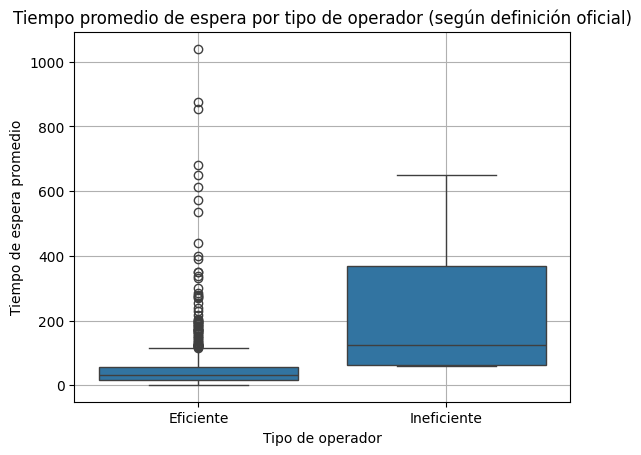

In [39]:
resumen_total['grupo'] = resumen_total['ineficiente'].map({True: 'Ineficiente', False: 'Eficiente'})

sns.boxplot(data=resumen_total, x='grupo', y='espera_promedio')
plt.title("Tiempo promedio de espera por tipo de operador (según definición oficial)")
plt.xlabel("Tipo de operador")
plt.ylabel("Tiempo de espera promedio")
plt.grid(True)
plt.show()


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hace falta conclusiones finales y que redactes la interpretación de los resultados de tus pruebas estadísticas y también indicar por qué se realizaron. El notebook debe quedar completo así cómo la presentación.
</div>